# Titanic Survival Prediction

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Importing the Dataset Using Pandas

In [ ]:
df = pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploring the Dataset

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df = df.drop(['PassengerId','Ticket','Cabin'], axis=1)

In [ ]:
age_mean = df['Age'].mean()
df.loc[df['Age'].isna(), 'Age'] = age_mean


In [ ]:
Fare_mean = df['Fare'].mean()
df.loc[df['Fare'].isna(), 'Fare'] = Fare_mean

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Visulization

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

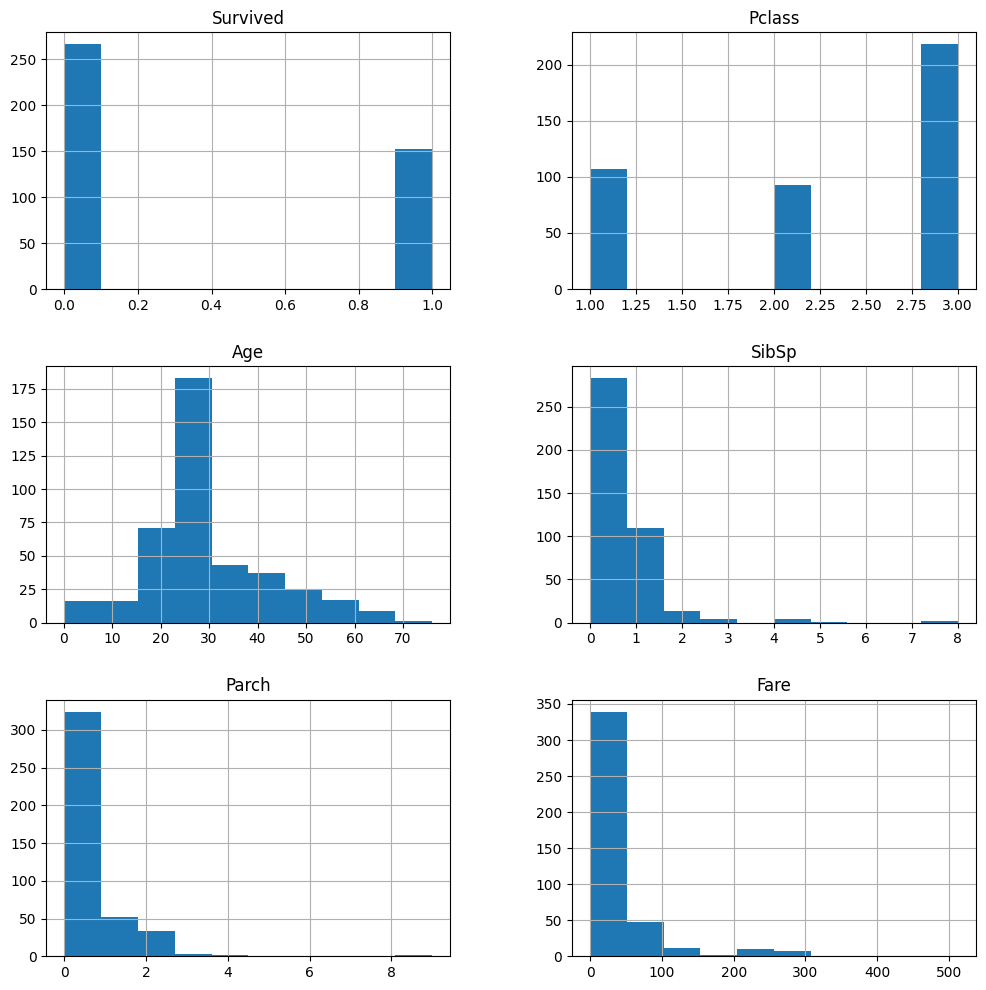

In [ ]:
df.hist(figsize=(12, 12))

Encoding the Data



In [ ]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')


In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])


In [ ]:
df.dtypes

Survived        int64
Pclass          int64
Name           object
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [ ]:
df = df.drop(['Name'], axis = 1)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,34.50000,0,0,7.8292,0,1,0
1,1,3,0,47.00000,1,0,7.0000,0,0,1
2,0,2,1,62.00000,0,0,9.6875,0,1,0
3,0,3,1,27.00000,0,0,8.6625,0,0,1
4,1,3,0,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,0,0,1
414,1,1,0,39.00000,0,0,108.9000,1,0,0
415,0,3,1,38.50000,0,0,7.2500,0,0,1
416,0,3,1,30.27259,0,0,8.0500,0,0,1


# Splitting the Dataset

In [ ]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.50000,0,0,7.8292,0,1,0
1,3,0,47.00000,1,0,7.0000,0,0,1
2,2,1,62.00000,0,0,9.6875,0,1,0
3,3,1,27.00000,0,0,8.6625,0,0,1
4,3,0,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,0,1
414,1,0,39.00000,0,0,108.9000,1,0,0
415,3,1,38.50000,0,0,7.2500,0,0,1
416,3,1,30.27259,0,0,8.0500,0,0,1


In [ ]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
336,2,1,32.00000,0,0,13.0000,0,0,1
31,2,1,24.00000,2,0,31.5000,0,0,1
84,2,1,30.27259,0,0,10.7083,0,1,0
287,1,1,24.00000,1,0,82.2667,0,0,1
317,2,1,19.00000,0,0,10.5000,0,0,1
...,...,...,...,...,...,...,...,...,...
71,3,1,21.00000,0,0,7.8958,0,0,1
106,3,1,21.00000,0,0,7.8208,0,1,0
270,1,1,46.00000,0,0,75.2417,1,0,0
348,2,1,24.00000,0,0,13.5000,0,0,1


# Training and Predicting

Logistic Regression

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model1_prediction = model1.predict(X_test)

Support Vector Machine

In [ ]:
model2 = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)





GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

Random Forest

In [ ]:
model3 = RandomForestClassifier()

param_grid1 = {'n_estimators': [1, 5, 10, 20 , 100], 'max_depth': [None,1, 5, 10]}

grid_search1 = GridSearchCV(estimator=model3, param_grid=param_grid1, cv=5)
grid_search1.fit(X_train, Y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 5, 10],
                         'n_estimators': [1, 5, 10, 20, 100]})

# Evaluation

Logistic Regression

In [ ]:
accuracy_score(Y_test,model1_prediction)

1.0

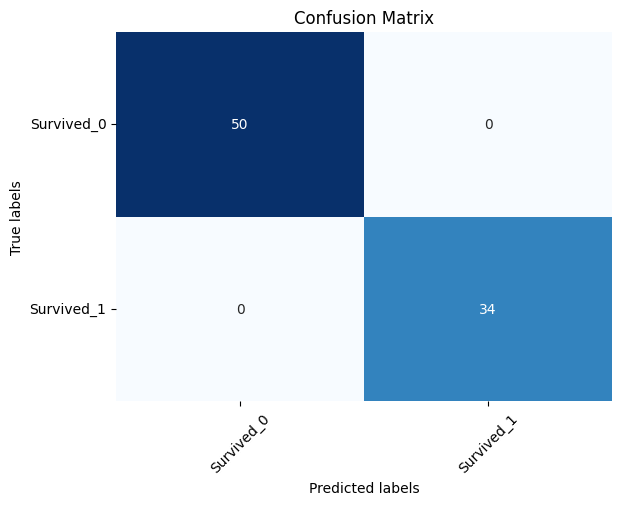

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, model1_prediction)
fig, ax = plt.subplots()

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Survived_0', 'Survived_1'])
ax.yaxis.set_ticklabels(['Survived_0', 'Survived_1'])

# Rotate tick labels if needed
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()


Support Vector Machine

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_


best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, Y_test)


print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy on Testing Data:", accuracy)

Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}
Best Score: 1.0
Accuracy on Testing Data: 1.0


Random Forest

In [ ]:
best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_


best_model1 = grid_search1.best_estimator_
accuracy1 = best_model1.score(X_test, Y_test)

print("Model 3 - Best Hyperparameters:", best_params1)
print("Model 3 - Best Score:", best_score1)
print("Model 3 - Accuracy on Testing Data:", accuracy1)


Model 3 - Best Hyperparameters: {'max_depth': None, 'n_estimators': 5}
Model 3 - Best Score: 1.0
Model 3 - Accuracy on Testing Data: 1.0
